# Subscriber Activities
###StrataScratch Comments Data Analysis + NLP + Data Visualization 

In [1]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 8.6 kB/s  eta 0:00:01     |█████████████████████▊          | 527.1 MB 21.0 MB/s eta 0:00:12     |██████████████████████▉         | 555.3 MB 25.7 MB/s eta 0:00:09
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import nlp and graphing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import math

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

In [6]:
## In case you do not have 'en_core_web_lg load it like this
# !python3 -m spacy download en_core_web_lg

In [7]:
# To Make Graphs less blurry change dpi from 76 to 1000
plt.rcParams['figure.dpi'] = 100 ; plt.rcParams['savefig.dpi'] = 100
# plt.rcParams['figure.dpi'] = 1000 ; plt.rcParams['savefig.dpi'] = 1000

# always copy never type!!

In [37]:
df = pd.read_csv('strata_overlapping_channels_vid_info.csv',low_memory=False)
df = df.loc[df.channelTitle !='StrataScratch']
string_chans = ['title','description']
for o in string_chans:
    df[o] = df[o].astype(str)
df.tail(2)

vid_id           publishedAt                 channelId  \
1315  UYSvTfVEJJQ  2021-03-25T16:00:07Z  UCY8mzqqGwl5_bTpBY9qLMAA   
1316  4EbIXCtqrmQ  2021-03-23T16:00:03Z  UCY8mzqqGwl5_bTpBY9qLMAA   

                                                  title  \
1315  What's The Best Cloud Provider To Start With? ...   
1316  How To Best Start Your First Data Engineering ...   

                                            description   channelTitle  \
1315  Are you new to data engineering and not sure w...  Andreas Kretz   
1316  Want to start your first data engineering proj...  Andreas Kretz   

      categoryId duration  view_count  comment_count  \
1315          27  PT3M11S        1184              3   
1316          27  PT3M34S        2022              6   

                                                   tags  \
1315  ['whats the best cloud provider to start with'...   
1316  ['how to best start your first data engineerin...   

                                             m_response  \
1315  {'kind': 'youtube#searchListResponse', 'etag':...   
1316  {'kind': 'youtube#searchListResponse', 'etag':...   

                                             d_response       vid_age_unix  \
1315  {'kind': 'youtube#videoListResponse', 'etag': ...  36898310064465000   
1316  {'kind': 'youtube#videoListResponse', 'etag': ...  37071114064465000   

                       vid_age  views_per_minute  
1315  427 days 01:31:50.064465          0.001925  
1316  429 days 01:31:54.064465          0.003273

In [38]:
# df.to_csv('strata_overlapping_channels_vid_info.csv',index=False)

In [39]:
df['vid_age'] =pd.Timestamp.now(tz='utc') - pd.to_datetime(df.publishedAt, utc=True)

In [40]:
# limit df to only videos less than 900 days old
df = df.loc[df.vid_age < pd.Timedelta(days=900)]

In [41]:
df['vid_age_unix'] = df.vid_age.astype(np.int64)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [42]:
# create views per minute by bringin nano seconds to seconds then seconds to minutes
df['views_per_minute'] = df.view_count /df.vid_age_unix *1e9 *60 

In [43]:
df.channelTitle.unique()

array(['codebasics', 'Ken Jee', 'Luke Barousse', 'techTFQ',
       'Data Interview Pro', 'Krish Naik', 'Weights & Biases',
       'Normalized Nerd', 'R Programming 101', 'Anastasia K', 'Jovian',
       'Tuan Vu', 'sqlbelle', 'GO FIGURE BY GOJEK', "What's AI",
       'The Work Life Man', 'Kylie Ying', 'Data 360 YP',
       'The AI Epiphany', 'Becoming a Data Scientist', 'freeCodeCamp.org',
       'Corey Schafer', 'Tiff In Tech', 'Tech With Tim', 'whatsdev',
       'Python Programmer', 'TechLead', 'Karolina Sowinska', 'Joma Tech',
       'Data School', 'Tina Huang', 'Andreas Kretz'], dtype=object)

### Create Word stems of all words

In [44]:
#create word stems
def wao2(df=df, col='desc'):
    list_of_sentences = [sentence for sentence in df[col]]
    lines = []
    for sentence in list_of_sentences:
        words = sentence.split()
        for w in words:
            lines.append(w)
    
    # create second list that excludes all non letters or numbers
    lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]
    lines2 = []
    for word in lines:
        if word != '':
            lines2.append(word)    
    
    # Reduce each word to it's stem for a more specific word count
    s_stemmer = SnowballStemmer(language='english')
    stem = []
    for word in lines2:
        stem.append(s_stemmer.stem(word))

    # get rid of all stop words
    stem2  = []
    for word in stem:
        if word not in nlp.Defaults.stop_words:
            stem2.append(word)

    #save df2 to the count of each individual word
    df2 = pd.DataFrame(stem2)
    df2 = df2[0].value_counts()
    
    # create "top words"
    df2 = df2[:1000]
    
    top_words = [o for o in df2.index]
    return top_words, stem2#top_ewords

In [45]:
# # Run WAO func
# df_name = df
# col = 'title'
# top_words= [];top_ewords = []
# top_words,stem2 = wao2(df=df_name,col=col, myTitle='All Video Titles ');print('top_words'+str(top_words[:5]));#print('top_ewords'+str(top_ewords))

In [46]:
# Run WAO func
def make_word_cloud(df,col):
    top_words= [];top_ewords = []

    top_words, words = wao2(df=df,col=col)#get words
    
    text = ' '.join(words) # create long tex of words
    
    wordcloud = WordCloud(width=700, height=800).generate(text)
    
    return len(words),wordcloud

In [47]:
def print_top_bottom(percent,col):    
    sorts = ['view_count','views_per_minute']
    for sort in sorts:
        for col in cols:
            portion = ['Top','Bottom'];
            perc = int(round(len(df)* (percent/100),0)) #Make percent integer for num of rows
            fig = plt.figure(figsize=(12,6))
            for idx,o in enumerate(portion):
                if o == 'Top':asc = False #create top or bottom percent
                else: asc = True

                dft = df.sort_values(sort,ascending=asc);dft = dft[:perc] #just use top 10%

                ax = fig.add_subplot(1,2,idx+1)
                words,wordcloud = make_word_cloud(df=dft,col=col,portion=o)
                ax.imshow(wordcloud, interpolation='bilinear')
                ax.axis('off')
                plt.title(f'{o} {str(percent)}%rows {col}: {words} wds. By: {sort}')

---

In [48]:
# Run WAO func
def make_word_cloud_non_overlap(stems,max_words):
    stems = [stem for stem in stems if len(stem)<13]
    text = ' '.join(stems) # create long tex of words
    
    wordcloud = WordCloud(max_words=max_words,width=700, height=800, relative_scaling=1).generate(text)
    
    return len(stems),wordcloud, stems[:5]

In [49]:
def print_top_bottom_no_overlap(percent, max_words=42):    
    sorts = ['view_count','views_per_minute']
    for sort in sorts:
        for col in cols:
            portion = ['Top','Bottom']
            perc = int(round(len(df)* (percent/100),0)) #Make percent integer for num of rows
            fig = plt.figure(figsize=(12,6))
#             for idx,o in enumerate(portion):
#             if o == 'Top':asc = False #create top or bottom percent
#             else: asc = True
            
            #create dft and dfb top and bottom word lists
            dft = df.sort_values(sort,ascending=False);dft = dft[:perc] #just use top x% or rows            
            tt_ws, top_stems = wao2(df=dft,col=col)
            dfb = df.sort_values(sort,ascending=True);dfb = dfb[:perc] #just use top x% or rows            
            bt_ws, bottom_stems = wao2(df=dfb,col=col)

            bottom_stems_new = [o for o in bottom_stems if o not in top_stems] #clear out overlapping words
            top_stems_new = [o for o in top_stems if o not in bottom_stems] #clear out overlapping words

            fig.suptitle(f'Max Words Per Cloud = {max_words}', fontsize=16)
        
            #Top
            ax = fig.add_subplot(1,2,1)
            
            word_count_top,wordcloud,top_five = make_word_cloud_non_overlap(top_stems_new,max_words=max_words)
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            top_stems_new = top_stems_new[:2]
            plt.title(f'Top {str(percent)}%rows {col}: {word_count_top} wds. By: {sort}')
            
            
            #Bottom
            ax = fig.add_subplot(1,2,2)
            word_count_bottom,wordcloud,top_five = make_word_cloud_non_overlap(bottom_stems_new,max_words=max_words)
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            bottom_stems_new = bottom_stems_new[:2]
            plt.title(f'Bottom {str(percent)}%rows {col}: {word_count_bottom} wds. By: {sort}')
            

---

---

### Set Max Words and Columns

In [50]:
cols = ['title','description']
max_words = 43

# No Overlaping words

In [51]:
df.channelTitle.unique()

array(['codebasics', 'Ken Jee', 'Luke Barousse', 'techTFQ',
       'Data Interview Pro', 'Krish Naik', 'Weights & Biases',
       'Normalized Nerd', 'R Programming 101', 'Anastasia K', 'Jovian',
       'Tuan Vu', 'sqlbelle', 'GO FIGURE BY GOJEK', "What's AI",
       'The Work Life Man', 'Kylie Ying', 'Data 360 YP',
       'The AI Epiphany', 'Becoming a Data Scientist', 'freeCodeCamp.org',
       'Corey Schafer', 'Tiff In Tech', 'Tech With Tim', 'whatsdev',
       'Python Programmer', 'TechLead', 'Karolina Sowinska', 'Joma Tech',
       'Data School', 'Tina Huang', 'Andreas Kretz'], dtype=object)

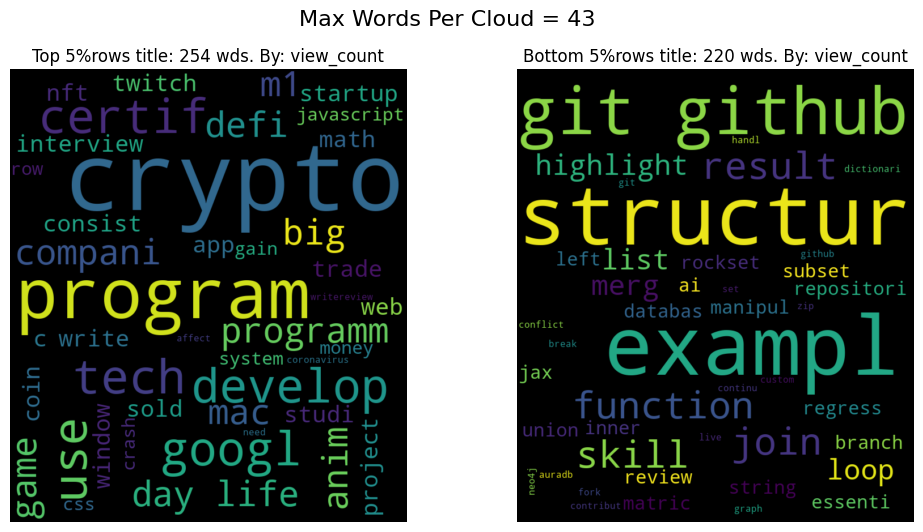

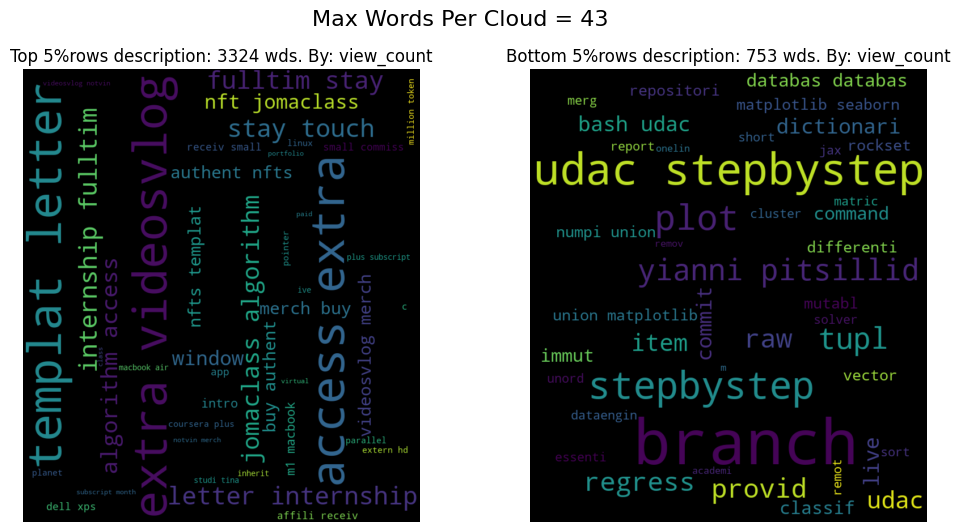

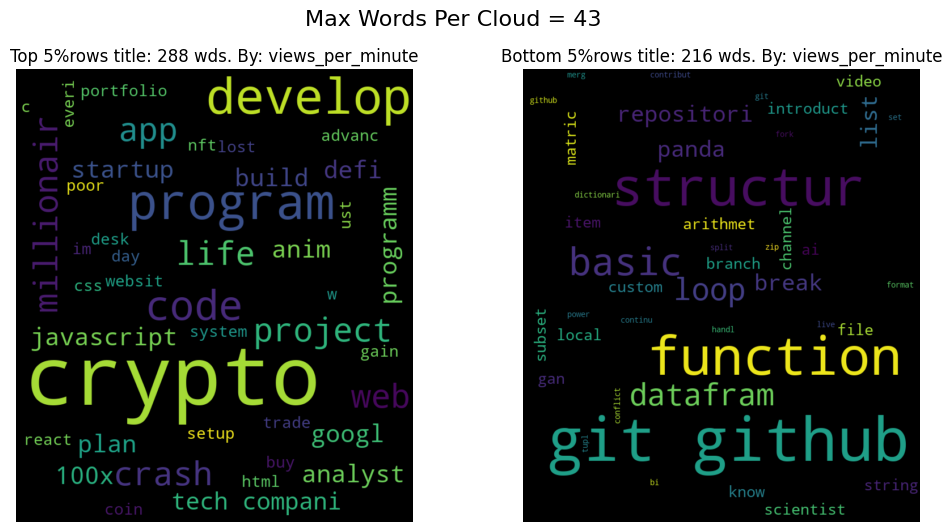

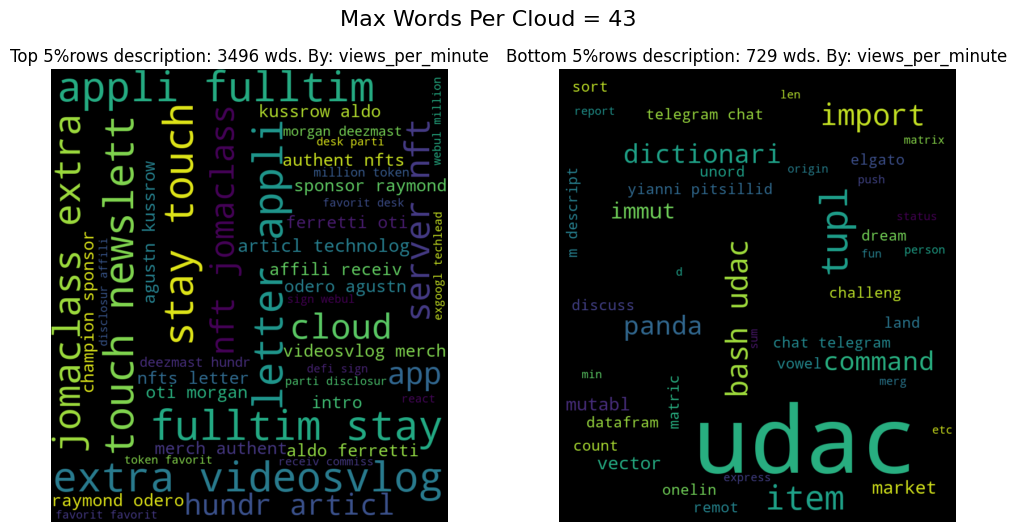

In [52]:
print_top_bottom_no_overlap(percent = 5,max_words=max_words)

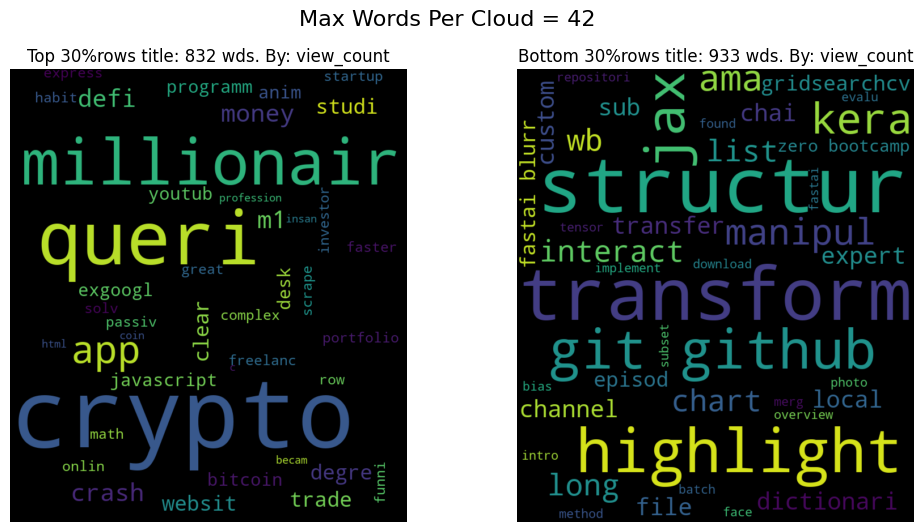

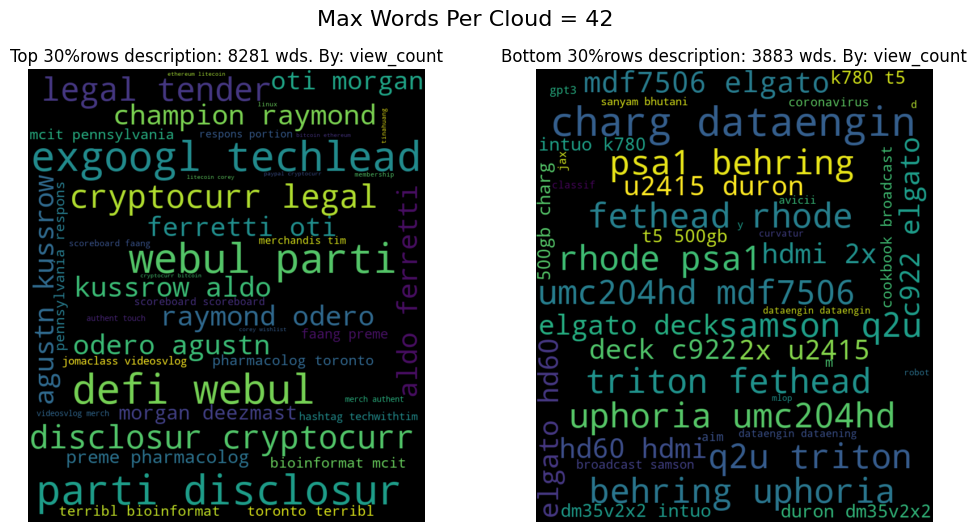

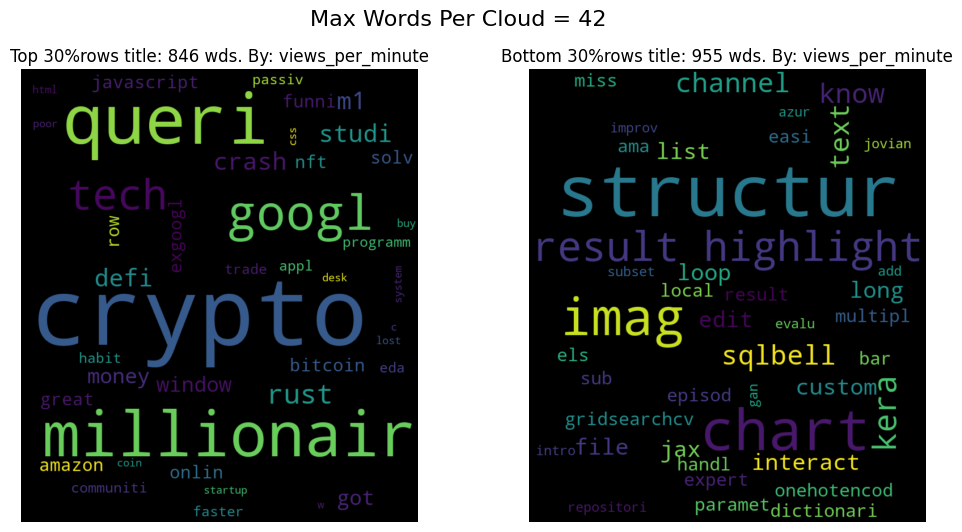

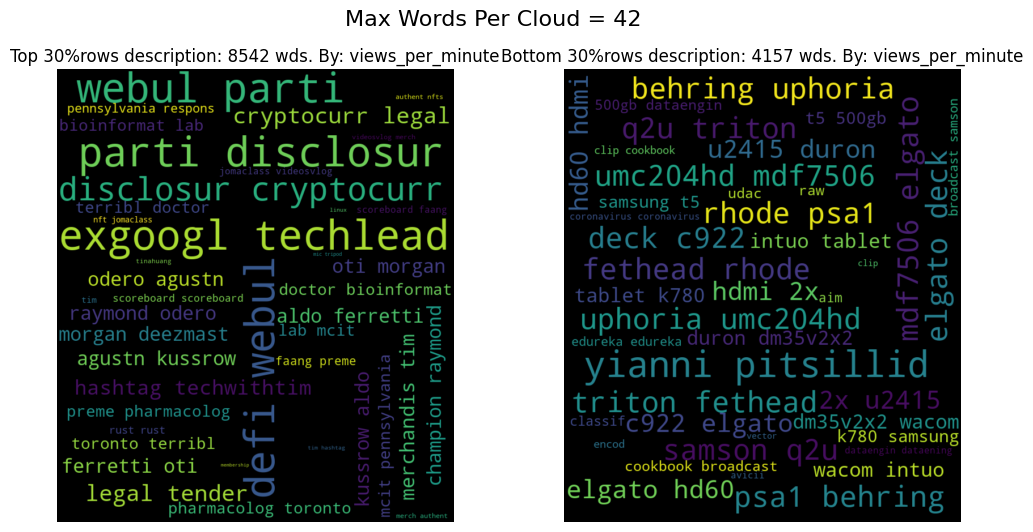

In [53]:
print_top_bottom_no_overlap(percent = 30)

In [54]:
percent = 5
perc = int(round(len(df)* (percent/100),0))
dfd = df.sort_values('views_per_minute',ascending=False);dfd = dfd[:perc] #just use top x% or rows            

dfd.title
for o in dfd.title:
    print(o)
    print('---')

a day in the life of an engineer working from home
---
how programmers attend meetings at big tech companies
---
interviewing at a startup be like... (ft. Steven He)
---
if Wolf of Wall Street were about crypto
---
10 years of coding in 13 minutes
---
how we write/review code in big tech companies
---
crypto traders be like...
---
why you NEED math for programming
---
C++ Programming Course - Beginner to Advanced
---
If Programming Was An Anime
---
i lost everything on crypto... what now.
---
a day in the life of a startup engineer working from home
---
if Apple made window blinds...
---
we need to talk... i'm poor now.  Don't buy the dip.
---
Become a DATA ANALYST with NO degree?!? The Google Data Analytics Professional Certificate
---
I quit my job at Google, here's what's next...
---
I Built a Trading Bot to let Subscribers Trade $25,000 on Twitch
---
Flutter Course for Beginners – 37-hour Cross Platform App Development Tutorial
---
how coronavirus affects programmers in big tech co

In [55]:
dfd[['channelTitle','title','views_per_minute','vid_age']][:10]

channelTitle                                              title  \
1149         Joma Tech  a day in the life of an engineer working from ...   
1147         Joma Tech  how programmers attend meetings at big tech co...   
1138         Joma Tech  interviewing at a startup be like... (ft. Stev...   
1137         Joma Tech           if Wolf of Wall Street were about crypto   
1146         Joma Tech                   10 years of coding in 13 minutes   
1161         Joma Tech     how we write/review code in big tech companies   
1141         Joma Tech                          crypto traders be like...   
1154         Joma Tech                  why you NEED math for programming   
856   freeCodeCamp.org      C++ Programming Course - Beginner to Advanced   
1160         Joma Tech                        If Programming Was An Anime   

      views_per_minute                  vid_age  
1149         22.452236 376 days 11:13:26.267552  
1147         12.537908 274 days 00:08:23.267552  
1138         11.477544  85 days 01:17:46.267552  
1137          9.103382  56 days 02:28:39.267552  
1146          8.998385 227 days 01:07:33.267552  
1161          8.532827 844 days 03:29:00.267552  
1141          7.783323 125 days 02:53:02.267552  
1154          7.310248 513 days 16:23:16.267552  
856           7.286970 106 days 02:43:25.267552  
1160          7.087230 830 days 03:29:00.267552

# Just our favorite 10 channels

In [27]:
specific_channels = ['Tina Huang','Data Interview Pro','Luke Barousse','techTFQ','Ken Jee','codebasics','Krish Naik','sqlbelle','Andreas Kretz','Tiff In Tech']

In [28]:
df = df.loc[df.channelTitle.isin(specific_channels)]

In [29]:
df.channelTitle.unique()

array(['codebasics', 'Ken Jee', 'Luke Barousse', 'techTFQ',
       'Data Interview Pro', 'Krish Naik', 'sqlbelle', 'Tiff In Tech',
       'Tina Huang', 'Andreas Kretz'], dtype=object)

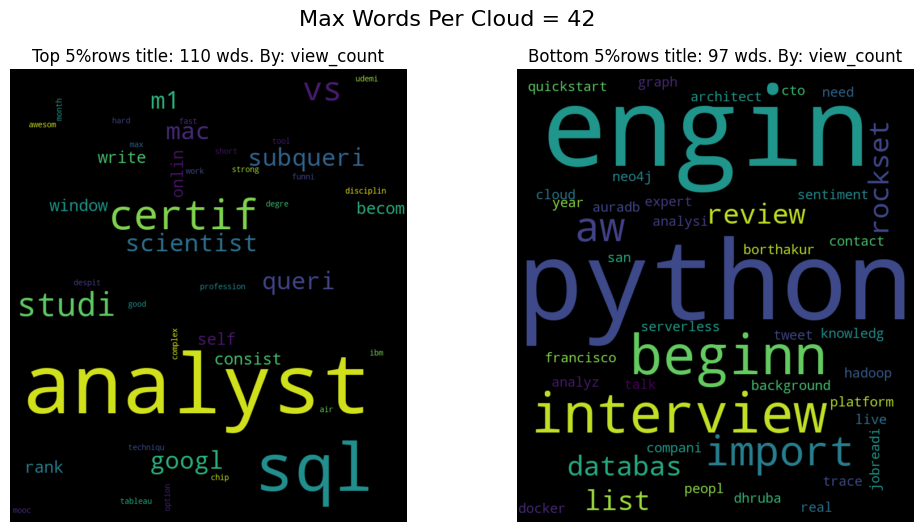

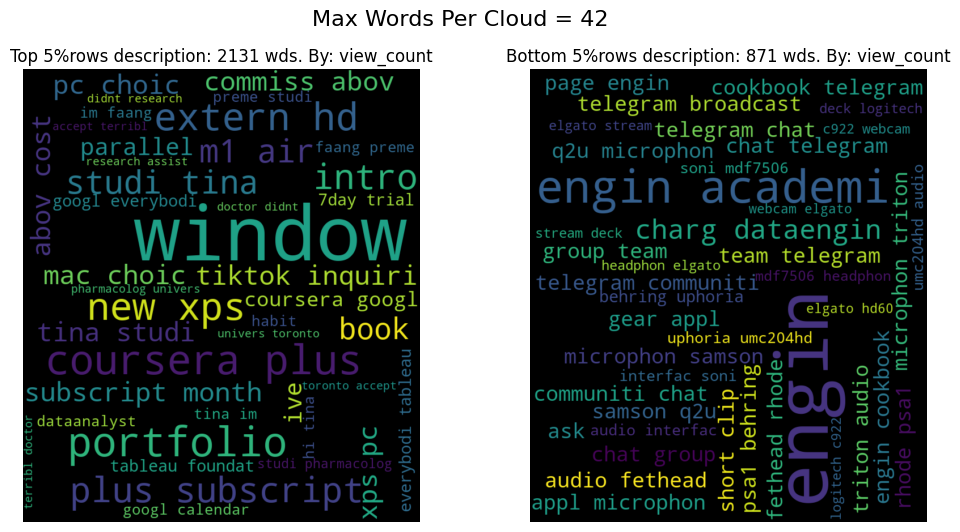

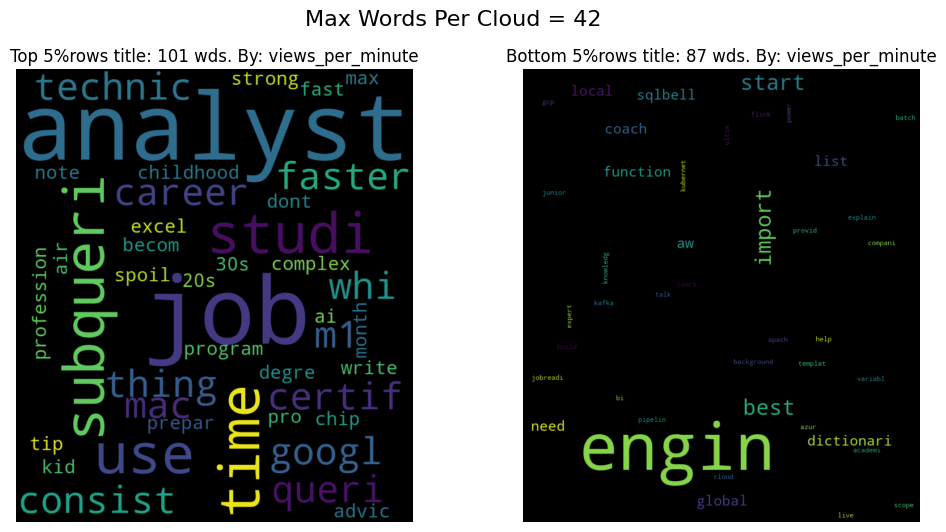

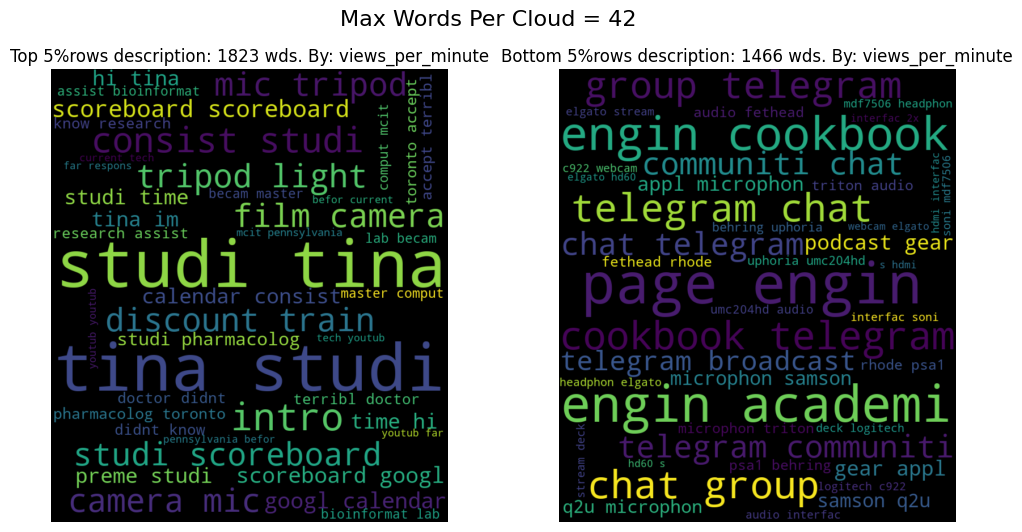

In [30]:
print_top_bottom_no_overlap(percent = 5)

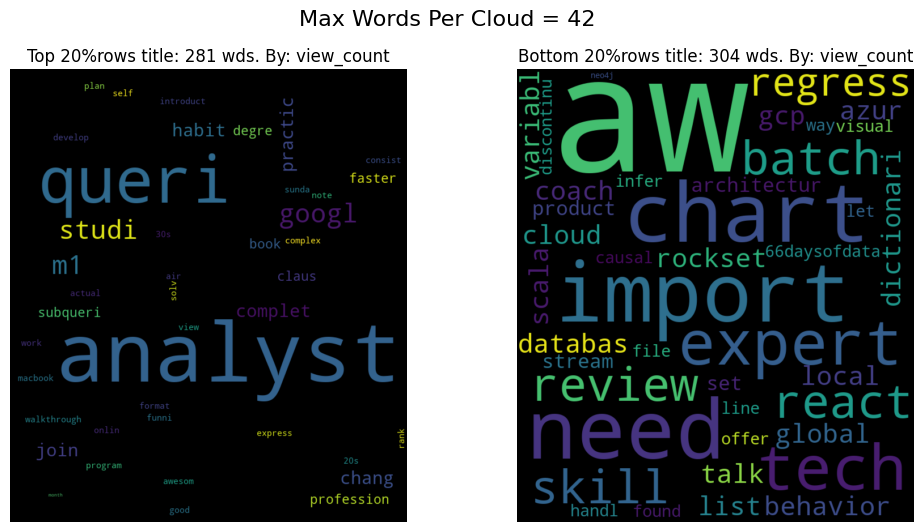

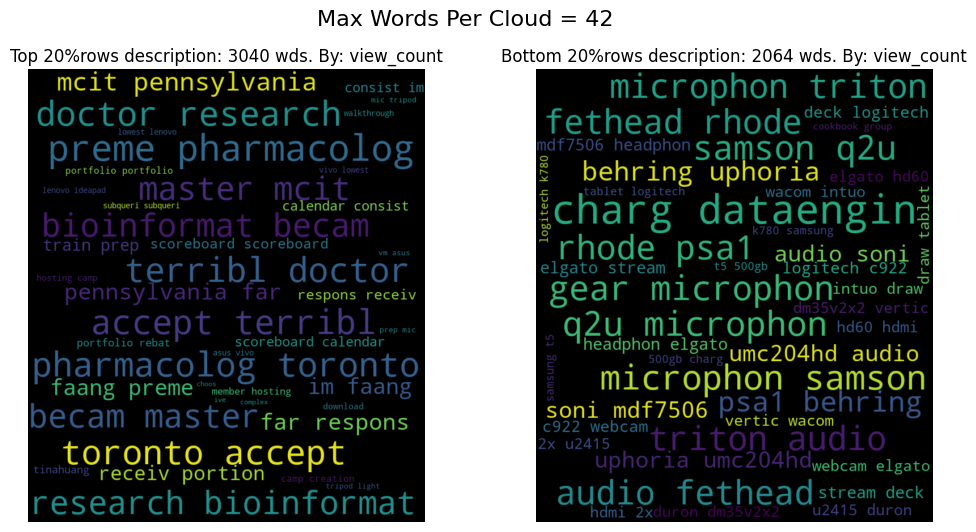

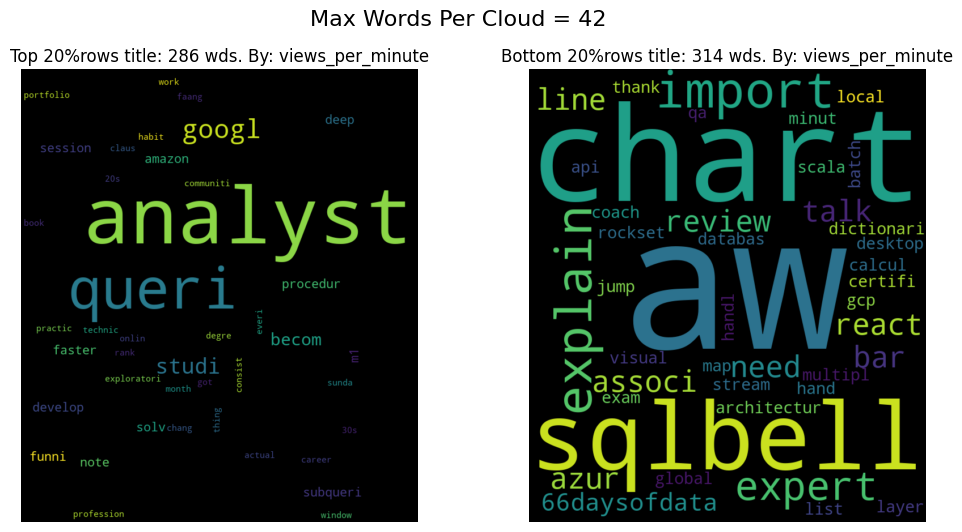

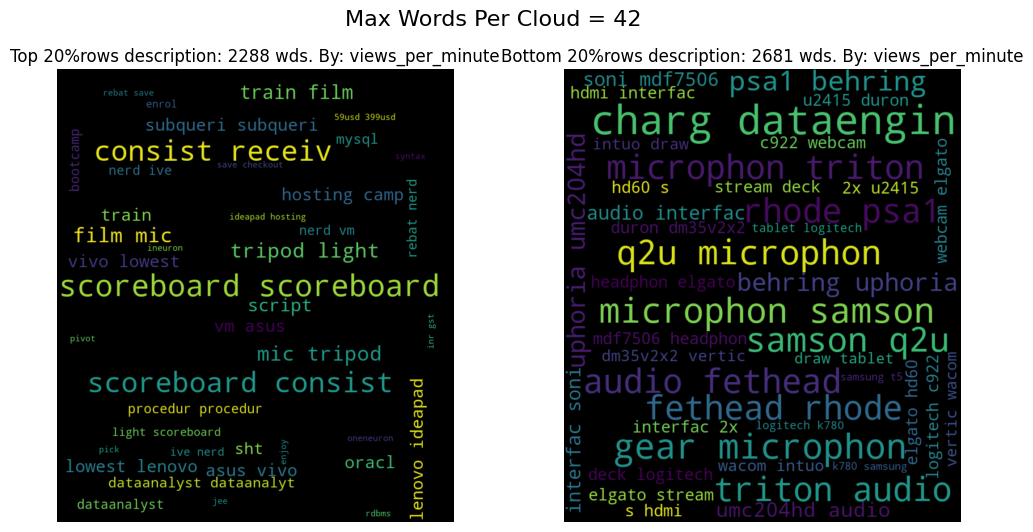

In [31]:
print_top_bottom_no_overlap(percent = 20)

In [32]:
percent = 5
perc = int(round(len(df)* (percent/100),0))
dfd = df.sort_values('views_per_minute',ascending=False);dfd = dfd[:perc] #just use top x% or rows            

dfd.title
for o in dfd.title:
    print(o)
    print('---')

Become a DATA ANALYST with NO degree?!? The Google Data Analytics Professional Certificate
---
How I use Excel as a Data Analyst
---
Tips to Learn Technical Things Faster
---
How I consistently study with a full time job (9 months in and still going strong)
---
How I Would Learn to be a Data Analyst
---
M1 Chip is as FAST as M1 Max!!! 🤯  (13" Mac Air Vs. 14" Mac Pro) #shorts
---
How to Take Notes for Technical Things
---
Preparing Kids For Data Science, AI Career | Don't Spoil Their Childhood!
---
Learn how to write SQL Queries(Practice Complex SQL Queries)
---
Career advice for your 20s and 30s
---
How to learn programming faster!
---
Techniques I use to be more disciplined and CONSISTENTLY study (with a full time job)
---
Podcast With Subham To Understand The Data Science Interview Process In FAANG
---
5 Unique Python Projects (beginner to intermediate)
---
Why you should not be a data scientist
---
How I trick myself to be self-disciplined
---
How I use SQL as a Data Analyst
---
Rea

In [36]:
dfd[['channelTitle','title','views_per_minute','vid_age']][:25]

channelTitle                                              title  \
131   Luke Barousse  Become a DATA ANALYST with NO degree?!? The Go...   
97    Luke Barousse                  How I use Excel as a Data Analyst   
1221     Tina Huang              Tips to Learn Technical Things Faster   
1248     Tina Huang  How I consistently study with a full time job ...   
105   Luke Barousse             How I Would Learn to be a Data Analyst   
108   Luke Barousse  M1 Chip is as FAST as M1 Max!!! 🤯  (13" Mac Ai...   
1220     Tina Huang             How to Take Notes for Technical Things   
9        codebasics  Preparing Kids For Data Science, AI Career | D...   
169         techTFQ  Learn how to write SQL Queries(Practice Comple...   
1223     Tina Huang                 Career advice for your 20s and 30s   
1232     Tina Huang                   How to learn programming faster!   
1234     Tina Huang  Techniques I use to be more disciplined and CO...   
236      Krish Naik  Podcast With Subham To Understand The Data Sci...   
1225     Tina Huang  5 Unique Python Projects (beginner to intermed...   
1250     Tina Huang             Why you should not be a data scientist   
1219     Tina Huang          How I trick myself to be self-disciplined   
103   Luke Barousse                    How I use SQL as a Data Analyst   
24       codebasics  Reality behind data science, machine learning ...   
1251     Tina Huang   Why I work so hard (despite having a ‘good’ job)   
153         techTFQ  Subquery in SQL | Correlated Subquery + Comple...   
143         techTFQ          Solving SQL Query | Rows to Column in SQL   
99    Luke Barousse  They became Data Analysts with THIS - Google D...   
1236     Tina Huang  How I motivate myself to study with a full tim...   
1222     Tina Huang                                   stop being lazy.   

      views_per_minute                  vid_age  
131           5.030123 442 days 20:41:49.681339  
97            3.035922  18 days 07:31:33.681339  
1221          2.317173  27 days 04:32:00.681339  
1248          2.254638 236 days 22:01:42.681339  
105           2.185390 149 days 06:31:59.681339  
108           1.748923 175 days 03:31:46.681339  
1220          1.572824  17 days 01:31:43.681339  
9             1.543025  35 days 01:01:54.681339  
169           1.525251 285 days 03:37:05.681339  
1223          1.464010  42 days 02:02:03.681339  
1232          1.422967 103 days 20:37:13.681339  
1234          1.417616 120 days 01:02:00.681339  
236           1.400767  11 days 03:13:21.681339  
1225          1.382819  54 days 23:01:57.681339  
1250          1.343969 256 days 23:01:56.681339  
1219          1.294500  13 days 01:31:53.681339  
103           1.285104 126 days 06:31:56.681339  
24            1.221230 107 days 03:36:51.681339  
1251          1.209269 264 days 00:31:48.681339  
153           1.129946 122 days 03:31:39.681339  
143           1.117747  16 days 03:10:39.681339  
99            0.985402  63 days 07:31:53.681339  
1236          0.899011 136 days 19:09:46.681339  
1222          0.855926  34 days 02:31:44.681339